In [1]:
#Importing the required packages to be used
import pandas as pd
import re
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

In [3]:
#Reading the data from a local file
report_data=pd.read_csv(r"C:\Users\sheky\Downloads\mueller_report.csv")

In [5]:
#understanding the data
report_data.head()

,page,line,text
0,1,1,U.S. Department of Justice
1,1,2,"AttarAe:,c\\'erlc Predtiet // Mtt; CeA1:ttiA"
2,1,3,Ma1:ertalPrn1:eetedUAder Fed. R. Crhtt. P. 6(e)
3,1,4,Report On The Investigation Into
4,1,5,Russian InterferenceIn The


In [7]:
#Getting the text data
text_data=report_data.iloc[:,2]

In [8]:
#Intializing an empty string
text_str=""

In [10]:
#Getting all the text data  into a single string
for i in text_data.iteritems():
    text_str+=str(i[1])

In [12]:
#Checking the length of alphabets in the string
len(text_str)

1258267

In [13]:
#Preprocessing for sentences
alphabets= "([A-Za-z])"
prefixes = "(Mr|St|Mrs|Ms|Dr)[.]"
suffixes = "(Inc|Ltd|Jr|Sr|Co)"
starters = "(Mr|Mrs|Ms|Dr|He\s|She\s|It\s|They\s|Their\s|Our\s|We\s|But\s|However\s|That\s|This\s|Wherever)"
acronyms = "([A-Z][.][A-Z][.](?:[A-Z][.])?)"
websites = "[.](com|net|org|io|gov)"
#Function to seperate out sentences from a string
def split_into_sentences(text):
    text = " " + text + "  "
    text = text.replace("\n"," ")
    text = re.sub(prefixes,"\\1<prd>",text)
    text = re.sub(websites,"<prd>\\1",text)
    if "Ph.D" in text: text = text.replace("Ph.D.","Ph<prd>D<prd>")
    text = re.sub("\s" + alphabets + "[.] "," \\1<prd> ",text)
    text = re.sub(acronyms+" "+starters,"\\1<stop> \\2",text)
    text = re.sub(alphabets + "[.]" + alphabets + "[.]" + alphabets + "[.]","\\1<prd>\\2<prd>\\3<prd>",text)
    text = re.sub(alphabets + "[.]" + alphabets + "[.]","\\1<prd>\\2<prd>",text)
    text = re.sub(" "+suffixes+"[.] "+starters," \\1<stop> \\2",text)
    text = re.sub(" "+suffixes+"[.]"," \\1<prd>",text)
    text = re.sub(" " + alphabets + "[.]"," \\1<prd>",text)
    if "”" in text: text = text.replace(".”","”.")
    if "\"" in text: text = text.replace(".\"","\".")
    if "!" in text: text = text.replace("!\"","\"!")
    if "?" in text: text = text.replace("?\"","\"?")
    text = text.replace(".",".<stop>")
    text = text.replace("?","?<stop>")
    text = text.replace("!","!<stop>")
    text = text.replace("<prd>",".")
    sentences = text.split("<stop>")
    sentences = sentences[:-1]
    sentences = [s.strip() for s in sentences]
    return sentences

In [15]:
#Passing the string to the function
sentences=split_into_sentences(text_str)

In [16]:
sen=[]

In [17]:
#Further preprocessing
for i in sentences:
    if i!='.':
        sen.append(i)

In [20]:
#Finding out the number of sentences present in the text
len(sen)

11698

In [1]:
#Using a pretrained model for sentence-embedding provided by Google.All the sentences were embedded into a 128-dimensional vector
#Tensorflow-2 model
#https://tfhub.dev/google/tf2-preview/nnlm-en-dim128/1
#This code was executed in a colab notebook
import tensorflow_hub as hub
embed = hub.load("https://tfhub.dev/google/tf2-preview/nnlm-en-dim128/1")
embeddings = embed(sen)

In [ ]:
#The embeddings were saved as a numpy array
np.save("sentence-vectors.npy", embeddings)


In [21]:
#Loading the numpy array
data=np.load('sentence-vectors.npy')

In [22]:
#Ensuring the shape of data
data.shape

(11698, 128)

In [6]:
#Hypertuning to find the optimal value of K in Kmeans Clustering algorithm
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_transformed)
    Sum_of_squared_distances.append(km.inertia_)

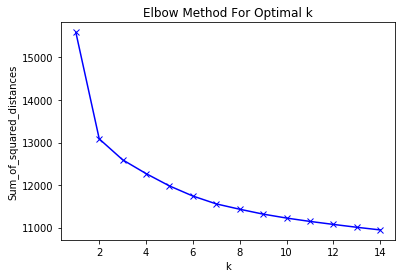

In [8]:
#Graph to find out optimal k.The optimal k was found out using elbow method
#The Elbow method is a heuristic method of interpretation and validation of consistency within cluster analysis designed to help finding the appropriate number of clusters in a dataset.
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [13]:
#Fixing the value of k
Sum_of_squared_distances = []
km = KMeans(n_clusters=5)
km = km.fit(data)
Sum_of_squared_distances.append(km.inertia_)

In [16]:
#Using TSNE Algorithm to reduce the 128 dimension to 2 dimension,
X_embedded = TSNE(n_components=2).fit_transform(data)

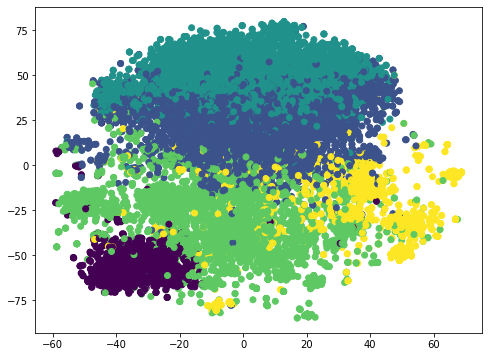

In [18]:
#Visualization of the 5 clusters.
plt.figure(figsize=(8, 6))
plt.scatter(X_embedded[:,0], X_embedded[:,1], c=km.labels_.astype(float))